In [1]:
import numpy as np
import matplotlib.pyplot as plt

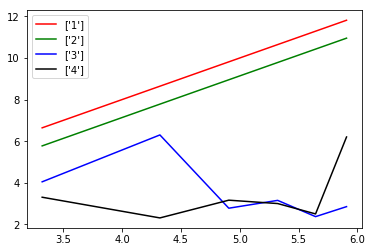

In [2]:
ne=4
nks=[10,20,30,40,50,60]
result=np.zeros((len(nks),ne+1))
for i,nk in enumerate(nks):
    data=np.load('../data/2DCI_S2xxy(1P-1P)_up_-1.0_-0.6_2.3_FBFM_KPOS%sN_kp(0,0).npy'%nk).reshape((ne,nk**2))
    result[i,0]=nk
    for j in range(ne):
        ps=data[j][data[j]>10**-20]
        result[i,j+1]=np.dot(-np.log(ps)/np.log(2),ps)
xs=np.log(result[:,0])/np.log(2)
plt.plot(xs,result[:,1],label=['1'],color='red')
plt.plot(xs,result[:,2],label=['2'],color='green')
plt.plot(xs,result[:,3],label=['3'],color='blue')
plt.plot(xs,result[:,4],label=['4'],color='black')
plt.legend()
plt.show()

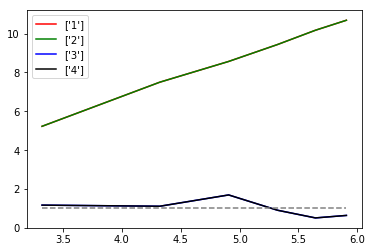

In [3]:
ne=4
nks=[10,20,30,40,50,60]
result=np.zeros((len(nks),ne+1))
for i,nk in enumerate(nks):
    data=np.load('../data/2DCI_S2xxy(1P-1P)_up_-1.0_-0.6_2.5_FBFM_KPOS%sN_kp(%s,%s).npy'%(nk,nk//2,(nk//2+1)//2)).reshape((ne,nk**2))
    result[i,0]=nk
    for j in range(ne):
        ps=data[j][data[j]>10**-20]
        result[i,j+1]=np.dot(-np.log(ps)/np.log(2),ps)
xs=np.log(result[:,0])/np.log(2)
plt.plot(xs,result[:,1],label=['1'],color='red')
plt.plot(xs,result[:,2],label=['2'],color='green')
plt.plot(xs,result[:,3],label=['3'],color='blue')
plt.plot(xs,result[:,4],label=['4'],color='black')
plt.plot(xs,np.ones(len(xs)),ls='--',color='grey')
plt.legend()
plt.show()

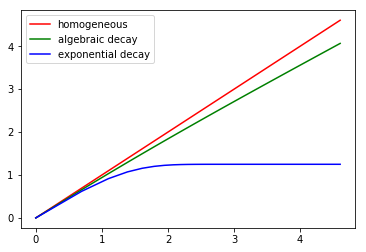

In [4]:
def norentropy(alpha,m):
    ps=np.ones(m)/m
    return -np.log(ps).dot(ps)

def algentropy(alpha,m):
    ps=np.array([(i+1)**alpha for i in range(m)])
    ps/=ps.sum()
    return -np.log(ps).dot(ps)

def expentropy(alpha,m):
    ps=np.array([np.exp(alpha*i) for i in range(m)])
    ps/=ps.sum()
    return -np.log(ps).dot(ps)

ms=np.linspace(1,100,99,dtype=np.int64)
alpha=-0.8
plt.plot(np.log(ms),[norentropy(alpha,m) for m in ms],label='homogeneous',color='red')
plt.plot(np.log(ms),[algentropy(alpha,m) for m in ms],label='algebraic decay',color='green')
plt.plot(np.log(ms),[expentropy(alpha,m) for m in ms],label='exponential decay',color='blue')
plt.legend()
plt.show()